In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
#df

In [3]:
# 切開來 -> 為之後步驟做準備
from sklearn.model_selection import train_test_split
# [90%的題目, 10%的題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris["target"], test_size=0.1)

In [10]:
#  算出方程式 -> fit
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
print("預測:", list(clu.predict(x_test))

預測: [0 1 2 0 1 2 2 2 2 0 0 0 0 2 0]


In [6]:
print("本來的標籤:", list(y_test))

本來的標籤: [2, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1]


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(clu.predict(x_test), y_test)

0.9333333333333333

In [12]:
# 拿出資料點被打上的標籤
clu.labels_

array([2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2,
       2, 0, 2])

In [14]:
from sklearn.metrics import silhouette_score
xs = []
ys = []
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(iris["data"])
    xs.append(k)
    score = silhouette_score(iris["data"], clu.labels_)
    ys.append(score)
print(xs)
print(ys)

[2, 3, 4, 5]
[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


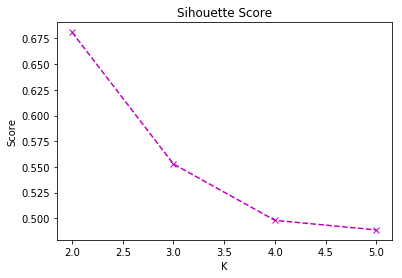

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.plot(xs, ys, "mx--")